# 📚 Import Dependencies 📦


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.naive_bayes import GaussianNB,MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
from collections import  Counter
import nltk
import pickle
import string


%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pathu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pathu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
# Importing Dataset
df = pd.read_csv("spam.csv", encoding="latin-1")

In [3]:
df.sample(1)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5231,ham,I realise you are a busy guy and i'm trying no...,NaN,NaN,NaN


In [4]:
# Dataset with required features only
df = pd.read_csv("spam.csv", encoding="latin-1", usecols=["v1","v2"])

In [5]:
df.sample(5)

,v1,v2
908,ham,WHITE FUDGE OREOS ARE IN STORES
3120,ham,Small problem in auction:)punj now asking tiwary
1902,ham,My sister got placed in birla soft da:-)
3069,ham,I'm now but have to wait till 2 for the bus to...
4679,ham,"That's cool he'll be here all night, lemme kno..."


# Data Preprocessing 


In [6]:
# Rename the Features
df.rename(columns={"v1": "output","v2": "input"}, inplace = True)

In [7]:
df.sample(1)

,output,input
285,ham,"K, I might come by tonight then if my class le..."


# Label Encoder 


In [8]:
# Encoding Target Feature 
le = LabelEncoder()
df["output"] = le.fit_transform(df["output"])

In [9]:
df.sample(3)

,output,input
2284,0,"Velly good, yes please!"
4592,0,It's ok i wun b angry. Msg u aft i come home t...
2421,0,Err... Cud do. I'm going to at 8pm. I haven't...


# Exploratory Data Analysis 


In [10]:
# Shape of the Dataset
df.shape

(5572, 2)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   output  5572 non-null   int32 
 1   input   5572 non-null   object
dtypes: int32(1), object(1)
memory usage: 65.4+ KB


In [12]:
# Check Null Values
df.isnull().sum()

output    0
input     0
dtype: int64

In [13]:
# Check Duplicate Values
df.duplicated().sum()

403

In [14]:
# Drop Duplicates
df = df.drop_duplicates(keep="first")

In [15]:
df.shape

(5169, 2)

In [16]:
df.head()

,output,input
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
# Ham & Spam Counts
df["output"].value_counts()

0    4516
1     653
Name: output, dtype: int64

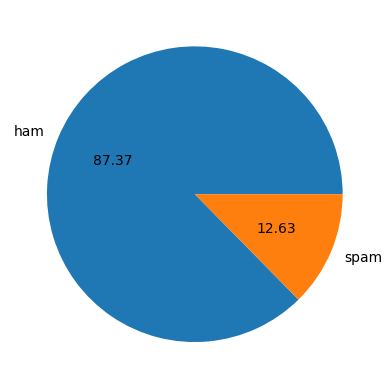

In [18]:
plt.pie(df["output"].value_counts(),autopct = "%.2f", labels=['ham','spam'])
plt.show()

# Feature Engineering


In [19]:
# Total No. of Characters in Data
df["characters"] = df["input"].apply(len)

In [20]:
# Total No. of Words in Data
df["word"] = df["input"].apply(lambda x:len( nltk.word_tokenize(x)))

In [21]:
# Total No. of Sentence
df["sentence"] = df["input"].apply(lambda x:len(nltk.sent_tokenize(x)))

In [22]:
df.head(1)

,output,input,characters,word,sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2


In [23]:
# Statistical Analysis of new features
df[["characters","word", "sentence"]].describe()

,characters,word,sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [24]:
# Statistical Analysis for HAM Data
df[df["output"]==0][["characters","word", "sentence"]].describe()


,characters,word,sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [25]:
# Statistical Analysis for SPAM Data
df[df["output"] ==1][["characters","word", "sentence"]].describe()

,characters,word,sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


# Histogram Plot 


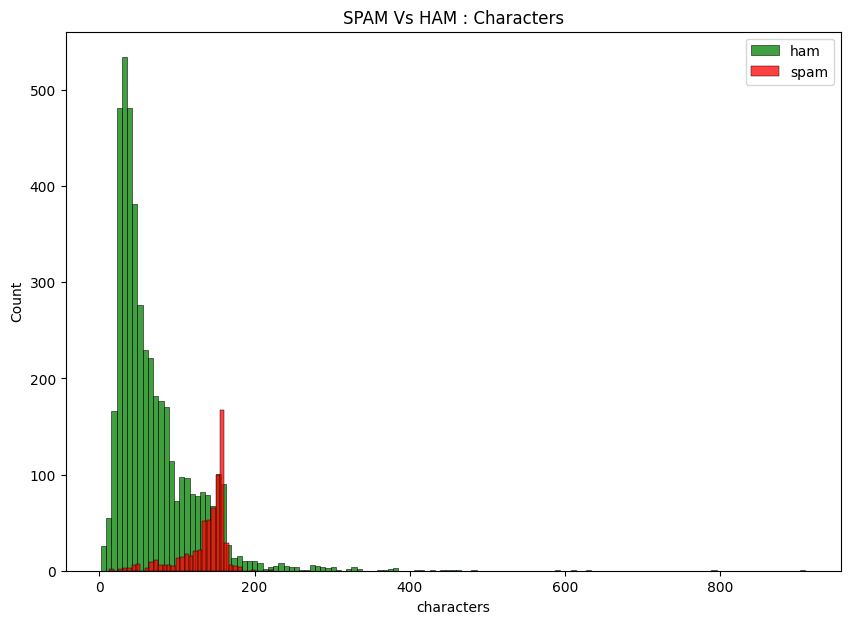

In [26]:
plt.figure(figsize=(10,7))
sns.histplot(df[df["output"]==0]["characters"],label= "ham",color="green")
sns.histplot(df[df["output"]==1]["characters"],label= "spam",color = "red")
plt.title("SPAM Vs HAM : Characters")
plt.legend()
plt.show()

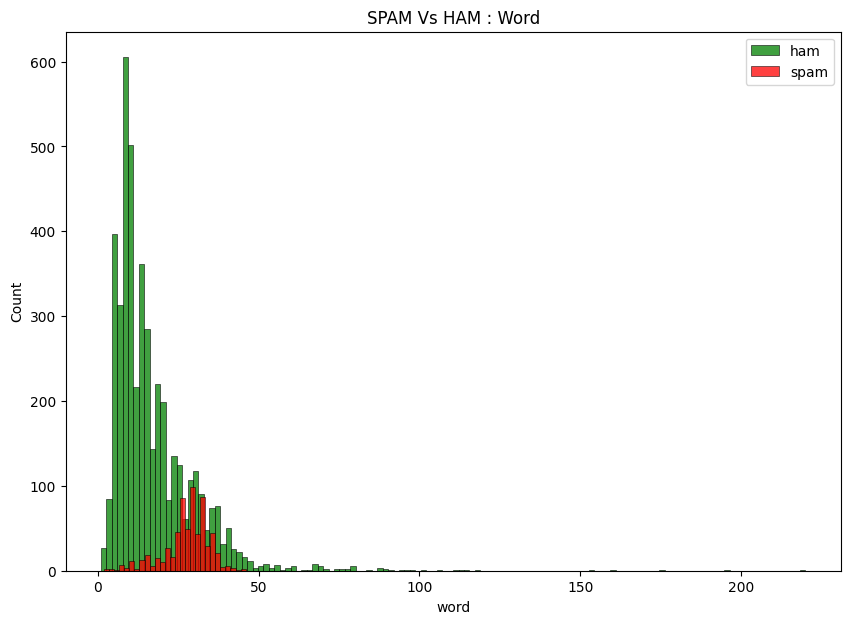

In [27]:
plt.figure(figsize=(10,7))
sns.histplot(df[df["output"]==0]["word"],label= "ham",color="green")
sns.histplot(df[df["output"]==1]["word"],label= "spam",color = "red")
plt.title("SPAM Vs HAM : Word")
plt.legend()
plt.show()

# Observations:
- Ham Characters and Words are more than Spam

#  Pair Plot


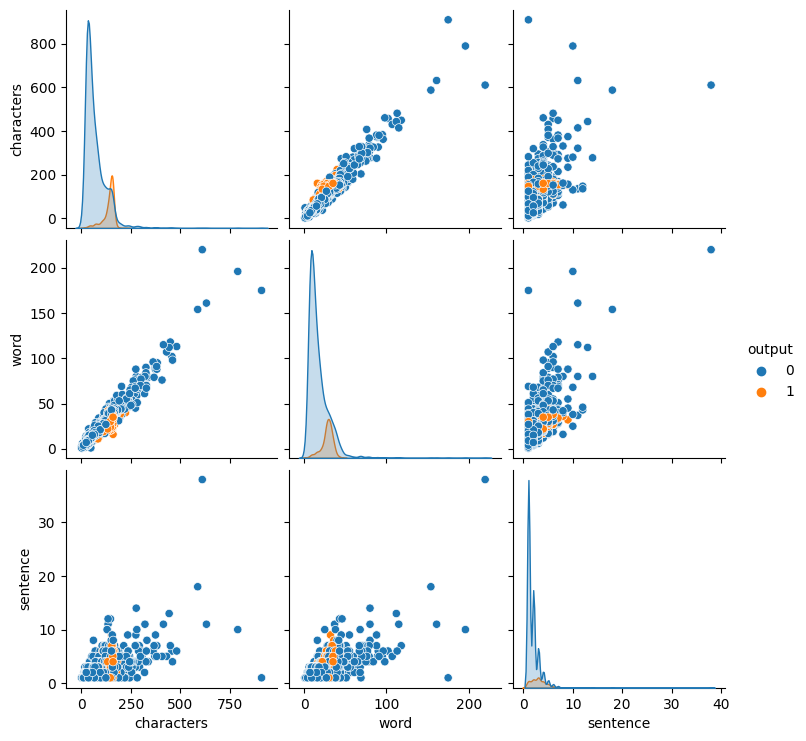

In [28]:
sns.pairplot(df,hue="output")

# 🌡️ Heatmap 🌡️


In [29]:
# Correlations between features
df.corr()

,output,characters,word,sentence
output,1.000000,0.384717,0.262912,0.263939
characters,0.384717,1.000000,0.965760,0.624139
word,0.262912,0.965760,1.000000,0.679971
sentence,0.263939,0.624139,0.679971,1.000000


<AxesSubplot: >

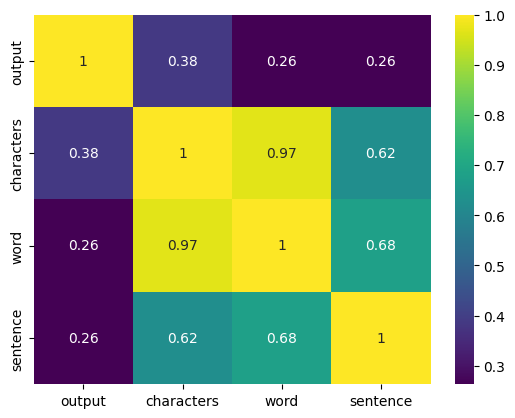

In [30]:
sns.heatmap(df.corr(),annot=True,cmap="viridis")

# Observations:
- "Characters" and "Word" have a moderately strong positive correlation of 0.965307

In [31]:
# Intilizing Porter Stemmer Class
ps = PorterStemmer()

In [32]:
# This Function helps to get Ready!!!

def data(text):
    text = text.lower()               #  Converts Text in Lower Case
    text = nltk.word_tokenize(text)   #  Breaks Text in Words 
    
    y = []
    for i in text:
        if i.isalnum():               #  Removing Special Characters
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:                    #  Removing Stopwords and Punctuation
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:                    #  Porter Stemmer removing unwanted words
        y.append(ps.stem(i))
        
    return " ".join(y)

In [33]:
# Checking data function 
data("shree ram 🚩 and shree mahakaleshawar 🔱 are everything for me")

'shree ram shree mahakaleshawar everyth'

In [34]:
df.sample(2)

,output,input,characters,word,sentence
4715,0,Hey. What happened? U switch off ur cell d who...,112,30,5
4513,0,"Sure, whenever you show the fuck up &gt;:(",42,13,1


In [35]:
# Transforming dataset using the "data" function in new column "new_data"
df["new_data"] = df["input"].apply(data)

In [36]:
df.sample(5)

,output,input,characters,word,sentence,new_data
1244,0,Now? I'm going out 4 dinner soon..,34,10,2,go 4 dinner soon
5132,0,it's still not working. And this time i also t...,114,30,4,still work time also tri ad zero save check lt gt
4439,0,I've got it down to a tea. not sure which flavour,49,13,2,got tea sure flavour
1062,0,Ok. Not sure what time tho as not sure if can ...,122,30,4,sure time tho sure get librari class tri see p...
5320,0,But we havent got da topic yet rite?,36,9,1,havent got da topic yet rite


# Word Cloud 


In [37]:
wc = WordCloud(
    background_color=None,
    width=800,
    height=400
)

In [38]:
# Wordcloud for SPAM
spam_wc = wc.generate(df[df["output"] ==1]["new_data"].str.cat(sep=" "))

# Wordcloud for HAM
ham_wc = wc.generate(df[df["output"] ==0]["new_data"].str.cat(sep=" "))

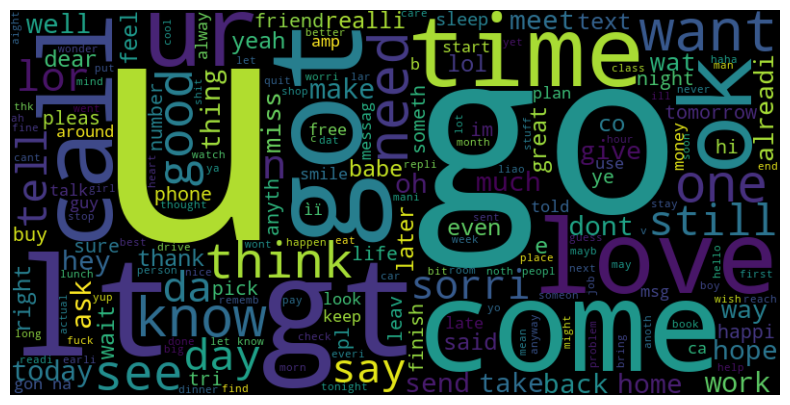

In [39]:
# SPAM 
plt.figure(figsize=(10, 5))
plt.imshow(spam_wc, interpolation="bilinear")
plt.axis("off")
plt.show()

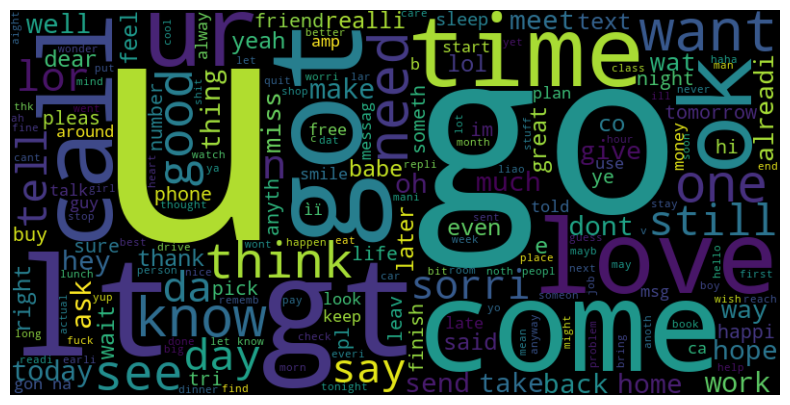

In [40]:
# HAM
plt.figure(figsize=(10, 5))
plt.imshow(ham_wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [41]:
# Spliting SPAM Sentences in Words
spam_corpus = []
for msg in df[df["output"]==1]["new_data"].tolist():
    for word in msg.split():
        spam_corpus.append(word)

#  Bar Plot 


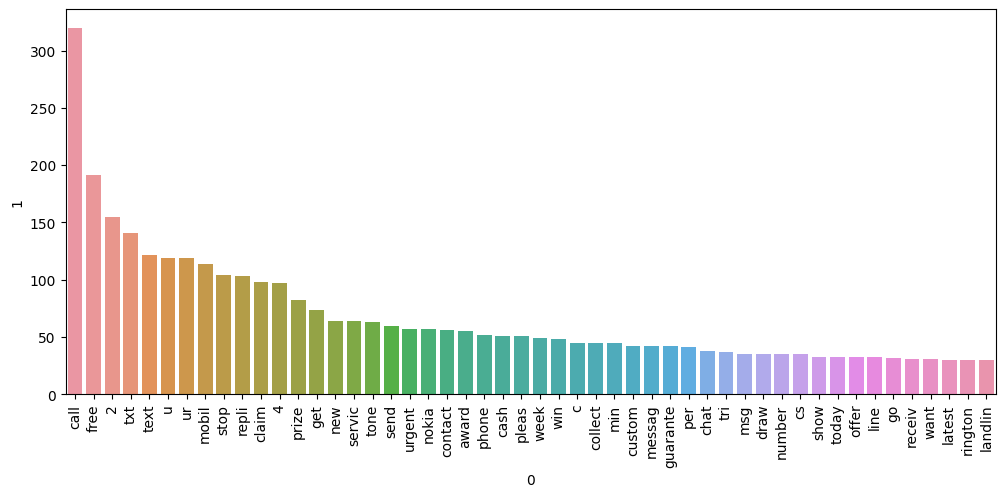

In [42]:
# Top 50 SPAM Words
a=pd.DataFrame(Counter(spam_corpus).most_common(50))[0]
b=pd.DataFrame(Counter(spam_corpus).most_common(50))[1]
plt.figure(figsize=(12,5))
sns.barplot(x= a,y=b)
plt.xticks(rotation=90)

plt.show()

In [43]:
# Spliting HAM Sentences in Words
ham_corpus = []
for msg in df[df['output'] == 0]['new_data'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

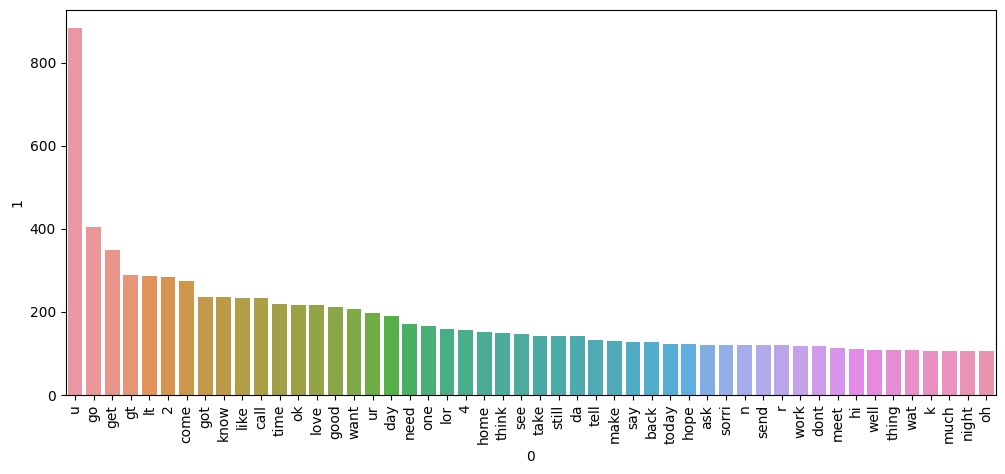

In [44]:
# Top 50 HAM Words
a=pd.DataFrame(Counter(ham_corpus).most_common(50))[0]
b=pd.DataFrame(Counter(ham_corpus).most_common(50))[1]
plt.figure(figsize=(12,5))
sns.barplot(x= a,y=b)
plt.xticks(rotation=90)

plt.show()

#  Vectorization 


In [45]:
# Initilizing TFIDF Vectorizer
tfidv = TfidfVectorizer(max_features=3000)

In [46]:
# Independent Feature
X = tfidv.fit_transform(df["new_data"]).toarray()

In [47]:
# Dependent Feature
y = df["output"].values

In [48]:
# Performing Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

#  Models Training 


In [49]:
# Models that are going to be trained
models={
    "Gaussian NB" : GaussianNB(),
    "Multinomial NB" : MultinomialNB(),
    "Bernoulli NB" : BernoulliNB(),
    "Logistic Regression" : LogisticRegression(),
    "SVC" : SVC(),
    "Decision Tree" : DecisionTreeClassifier(),
    "KNN" : KNeighborsClassifier(),
    "Bagging CLF" : BaggingClassifier(),
    "Random Forest" : RandomForestClassifier(),
    "ETC" : ExtraTreesClassifier(),
    "Ada Boost" : AdaBoostClassifier(),
    "Gradient Boost" : GradientBoostingClassifier(),
    "XGB" : XGBClassifier(),
    "XGBRF" : XGBRFClassifier()
}

In [50]:
# Creating a function train each model and calculate/return accuracy and precision
def train_clf (model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    pre = precision_score(y_test, y_pred)
    
    return acc, pre

In [51]:
# A FOR loop Calls "traim_clf" for each model and stores accuracy and precision
acc_s=[]
pre_s=[]

for name, model in models.items():
    accuracy, precision = train_clf(model, X_train, y_train, X_test, y_test)
    
    acc_s.append(accuracy)
    pre_s.append(precision)

In [52]:
# As Precision matter over Accuracy in this Data, Sorting in DESC order of Precision. All Scores of Models

scores_df = pd.DataFrame({"Algorithm": models.keys(), 
                          "Accuracy": acc_s, 
                         "Precision": pre_s}).sort_values(by="Precision", ascending=False)

#  Algorithms: Accuracy and Precision


In [53]:
scores_df

,Algorithm,Accuracy,Precision
1,Multinomial NB,0.970986,1.000000
6,KNN,0.905222,1.000000
2,Bernoulli NB,0.983559,0.991870
8,Random Forest,0.973888,0.991150
4,SVC,0.972921,0.982456
3,Logistic Regression,0.956480,0.979381
9,ETC,0.978723,0.975410
10,Ada Boost,0.961315,0.945455
12,XGB,0.971954,0.936000
11,Gradient Boost,0.955513,0.925926


# Observations:
- Multinomial NB has an accuracy of 97.29% and a precision of 100.00%.
- KNN (K-Nearest Neighbors) has an accuracy of 90.52% and a precision of 100.00%.
- Bernoulli NB has an accuracy of 98.16% and a precision of 99.17%.
- ETC (Extra Trees Classifier) has an accuracy of 97.97% and a precision of 98.35%.
- Random Forest has an accuracy of 97.49% and a precision of 98.28%.
- SVC (Support Vector Classifier) has an accuracy of 97.10% and a precision of 97.37%.
- Logistic Regression has an accuracy of 95.16% and a precision of 96.81%.
- Gradient Boost has an accuracy of 95.74% and a precision of 94.34%.
- XGB (Extreme Gradient Boosting) has an accuracy of 97.10% and a precision of 94.26%.
- Ada Boost has an accuracy of 96.42% and a precision of 93.16%.
- Bagging CLF (Classifier) has an accuracy of 95.36% and a precision of 87.50%.
- XGBRF (XGBoost Random Forest) has an accuracy of 94.00% and a precision of 87.25%.
- Decision Tree has an accuracy of 94.39% and a precision of 80.77%.
- Gaussian NB (Naive Bayes) has an accuracy of 86.75% and a precision of 50.22%.

# Observations:
- Models with high precision scores, such as Multinomial NB (100.00%), KNN (100.00%), and Bernoulli NB (99.17%), have a high ability to correctly identify positive instances.
- Models with high accuracy scores, such as Bernoulli NB (98.16%) and Random Forest (97.49%), make accurate overall predictions on the dataset.